# US Accidents Exploratory Data Analysis

    - Description
        This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

    - Inspiration
        US-Accidents data can be used for a variety of purposes, including real-time car accident prediction, studying hotspot locations for car accidents, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.
            
    - About dataset
        - Source: Kaggle
        - Information about accidents.
        - Analysis can help in deceasing the number of accidents.
        - Doesn't contain data about New York.


## Basic Questions

1. Which City in US has reported most no. of Accident Cases in last 6 years (2016-2021) ?
2. Per Day averagely how many road accidents took placed in US ?
3. Despite having most populated city why doesn't New York show up in the data?
4. Analysis the trend of acciendts/day and accidents/hour?
5. Analysis the trend of accidents year by year?


## Data Preparation and Cleaning

- Load the file using Pandas
- Search for some information about the data & the columns
- Fix any missing or incorrect values

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read & load the dataset into pandas dataframe
df= pd.read_csv("US_Accidents_Dec21_updated.csv")
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [5]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

## Percentage of missing values per columns

In [6]:
missing_percentages = df.isnull().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [7]:
missing_percentages[missing_percentages!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

In [8]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

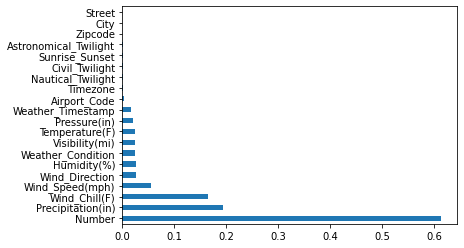

In [9]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

Drop the columns that have missing value >= 0.5 or should not use them.

## Exploratory Analysis and Visualization

In this dataset, we have different attributes like City and Timezone for each accident records. Here we will analyze these two features based on the no. of cases for each distinct location.


In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City Analysis

In [11]:
cities=df.City.unique()
len(cities)

11682

In [12]:
cities_by_accident=df.City.value_counts()
cities_by_accident[:20]


Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [13]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})
city_df

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
...,...,...
11676,Ridgedale,1
11677,Sekiu,1
11678,Wooldridge,1
11679,Bullock,1


In [14]:
top_10_cities = pd.DataFrame(city_df.head(10))
top_10_cities

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


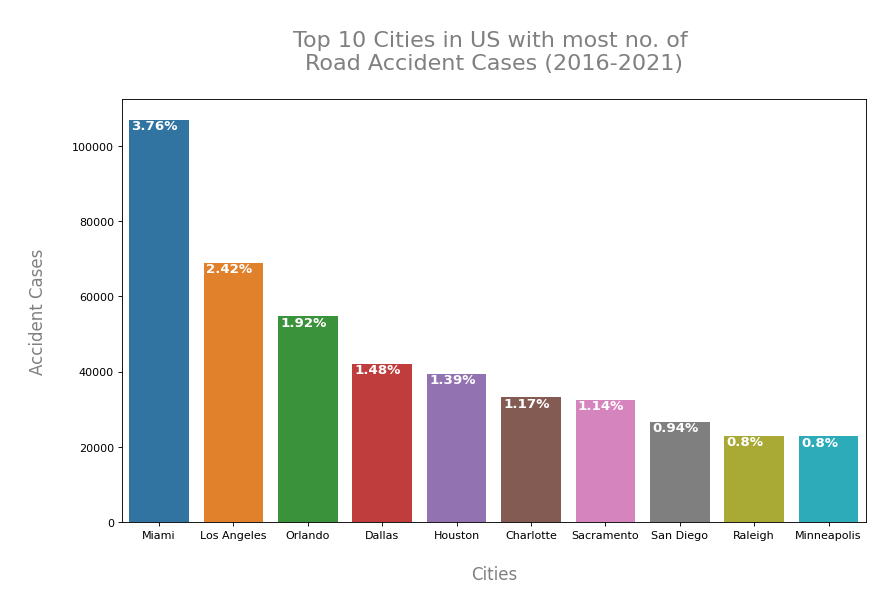

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)


ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'])
total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2021)\n', size=20, color='grey')


ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

plt.show()

Insights:

1. Miami is the city with highest (3.76%) no. of road accidents in US (2016-2021).

2. Los Angeles is the city with 2nd highest (2.42%) no. of road accidents in US (2016-2021).

3. Around 16% accident records of past 5 years are only from these 10 cities out of 11,681 cities in US (as per the dataset).

In [16]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/6))
print(round(hightest_cases/(6*365)))

17828
49


Insights:

4. In past 6 years (2016-2021) yearly 17828 road accidents (average) happened in Miami.

5. Averagely 25 accients occured in every 12 hours in Miami.

In [17]:
'New York' in df.City

False

In [18]:
'NY' in df.State

False

Insight:

6. No data for New York City.

In [19]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

1110 Cities, 9.5%
8727 Cities, 74.71%
11185 Cities, 95.75%
494 Cities, 4.23%
71 Cities, 0.61%
34 Cities, 0.29%


Insights:

In this Dataset, we have the records of total 11,681 Cities.

7. Out of which 9.5% (1110 Cities) cities in US, have only 1 accident record in past 6 years.

8. Around 74.71% (8,727 Cities) of all cities in US, have less than 100 total no. of road accidents.

9. Approximately 95.75% (11,185 Cities) cities in US, have the road accident records (2016-2020), less than 1,000.

10. There are 494 Cities (4.23%) in US, which have more than 1,000 total no. of road accidents in past 6 years.

11. There are 71 Cities (0.61%) in US, have more than 5,000 road accident records.

12. Only 34 Cities (0.29%) in US, have more than 10,000 road accident records.

### Time Analysis

In this dataset we have Start_Time & End_Time for the timings of each accident. Start_Time shows start time of the accident in local time zone. End_Time shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow.

In [20]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [21]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time=pd.to_datetime(df.Start_Time)

In [22]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [23]:
# convert timestamp date into hour of the day we use:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

### Year Analysis

In [24]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
year_df

,Year,Cases
5,2016,122024
4,2018,163176
3,2017,163918
2,2019,258615
1,2020,625864
0,2021,1511745


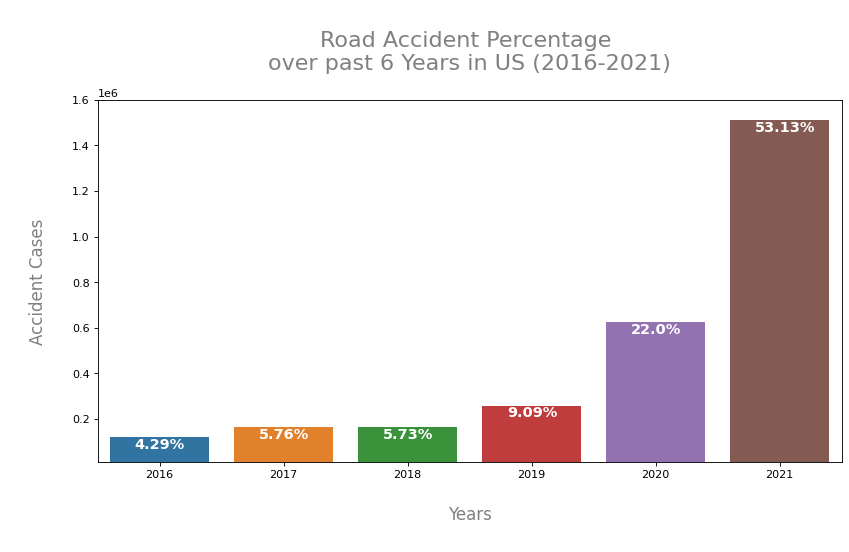

In [48]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,weight='bold',
                color='white')

plt.ylim(10000, 1600000)
plt.title('\nRoad Accident Percentage \nover past 6 Years in US (2016-2021)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.show()


Insights:

13. From the above graph, it is clear that in last 6 years (2016-2021) in US accidents percentage has increased significantly.

14. Around 75.13% of the total road accident records of last 6 years happened only within last 2 years (2020, 2021).

In [56]:
year_df['Accident/day'] = round(year_df['Cases']/(6*365))
year_df['Accident/hour'] = round(year_df['Cases']/(6*365*24))

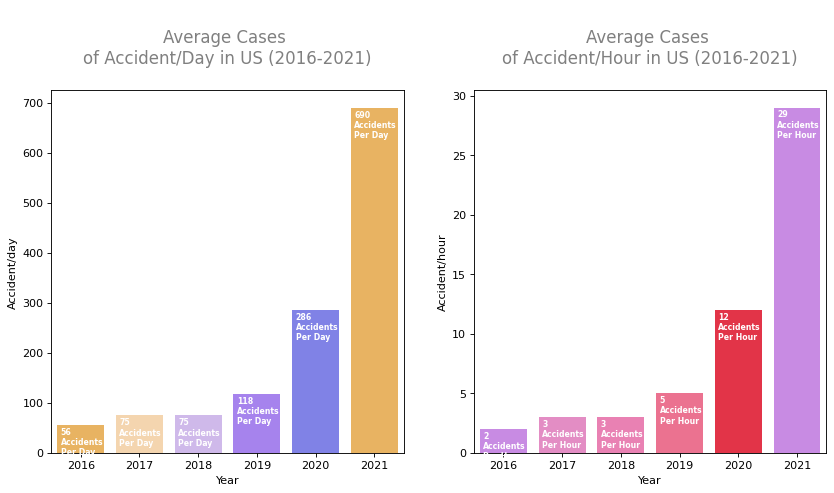

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12.5,6), dpi = 80)

count = 0
plots = ['Accident/day', 'Accident/hour']
plots_limit = [(-10, 500), (-0.5, 22.5)]
plots_bound = [(0, 500), (0, 20)]
plot_text = [60, 2.5]

colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732']]

for i in [ax1, ax2]:

    sns.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    
    var = plots[count].split('/')[-1].capitalize()
    
    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=7, color='white', weight='bold')


    i.set_title('\nAverage Cases \nof Accident/{} in US (2016-2021)\n'.format(var), fontsize =15, color='grey')

    count += 1

Insights:

15. In the year 2021, averagely 690 accidents happened per day in US.

16. From 2019 to 2021 the average accident/day has increased 2.5 times in US.

17. Compare to 2016 the accident/hour has increased 14.5 times in 2021.

18. In the year 2021, averagely 49 accidents happened per hour in US implies that approximately 8 accidents in every 10 minutes.

In [66]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

Text(0.5, 0, '\nDay of the Week\n')

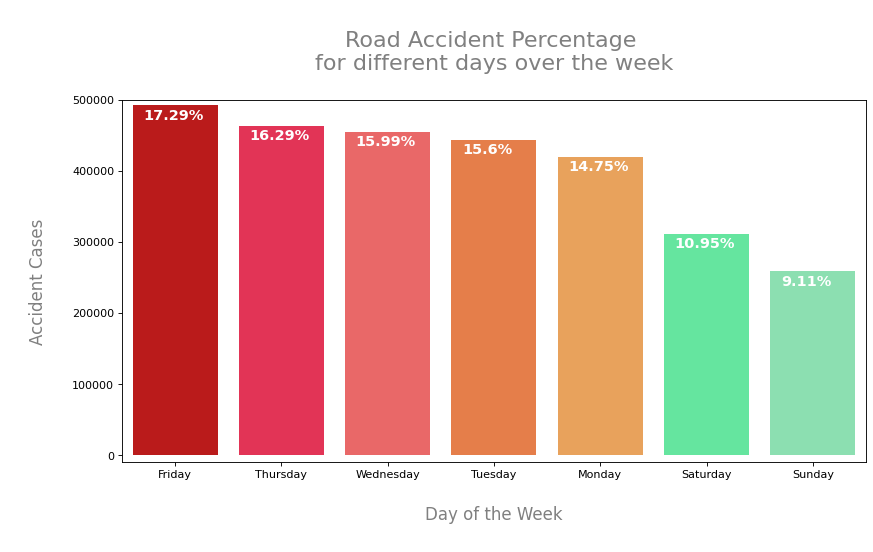

In [74]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,weight='bold',
                color='white')

plt.ylim(-10000, 500000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')

Insights:

19. Working Days of the week have approximately 4 times higher accident percentage, compared with the Weekend Days which is as our expectation.

20. Only around 20% road accident records occurred in weekend.

21. Friday of a week is having the highest percentage of road accidents.

22. On Sunday the percentage of road accidents in US is lowest.

## Summary and Conclusion

All Insights:

1. Miami is the city with highest (3.76%) no. of road accidents in US (2016-2021).

2. Los Angeles is the city with 2nd highest (2.42%) no. of road accidents in US (2016-2021).

3. Around 16% accident records of past 5 years are only from these 10 cities out of 11,681 cities in US (as per the dataset).

4. In past 6 years (2016-2021) yearly 17828 road accidents (average) happened in Miami.

5. Averagely 25 accients occured in every 12 hours in Miami.

6. No data for New York City.

7. Out of which 9.5% (1110 Cities) cities in US, have only 1 accident record in past 6 years.

8. Around 74.71% (8,727 Cities) of all cities in US, have less than 100 total no. of road accidents.

9. Approximately 95.75% (11,185 Cities) cities in US, have the road accident records (2016-2020), less than 1,000.

10. There are 494 Cities (4.23%) in US, which have more than 1,000 total no. of road accidents in past 6 years.

11. There are 71 Cities (0.61%) in US, have more than 5,000 road accident records.

12. Only 34 Cities (0.29%) in US, have more than 10,000 road accident records.

13. From the above graph, it is clear that in last 6 years (2016-2021) in US accidents percentage has increased significantly.

14. Around 75.13% of the total road accident records of last 6 years happened only within last 2 years (2020, 2021).

15. In the year 2021, averagely 690 accidents happened per day in US.

16. From 2019 to 2021 the average accident/day has increased 2.5 times in US.

17. Compare to 2016 the accident/hour has increased 14.5 times in 2021.

18. In the year 2021, averagely 49 accidents happened per hour in US implies that approximately 8 accidents in every 10 minutes.

19. Working Days of the week have approximately 4 times higher accident percentage, compared with the Weekend Days which is as our expectation.

20. Only around 20% road accident records occurred in weekend.

21. Friday of a week is having the highest percentage of road accidents.

22. On Sunday the percentage of road accidents in US is lowest.

